In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer,transpile
from qiskit.tools.visualization import plot_histogram,plot_state_city
import qiskit.quantum_info as qi

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

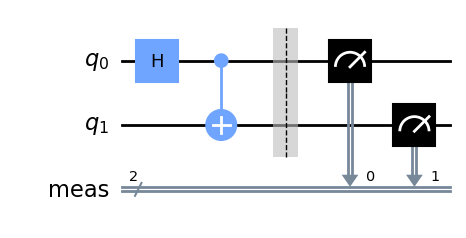

In [3]:
#Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()
circ.draw()

In [6]:
#Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ=transpile(circ,simulator)

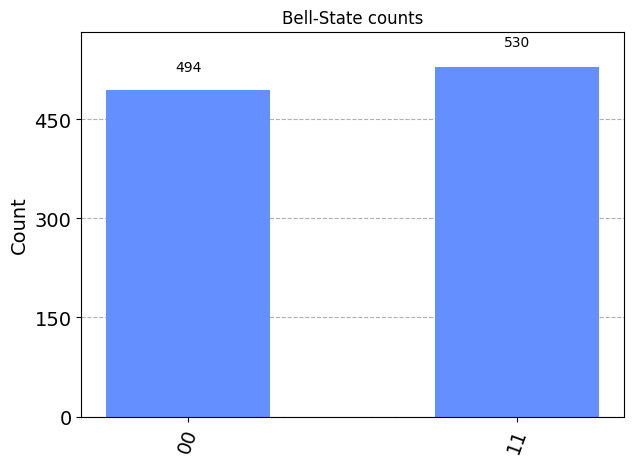

In [7]:
#Run and get counts
result=simulator.run(circ).result()
counts=result.get_counts(circ)
plot_histogram(counts,title='Bell-State counts')

In [8]:
result=simulator.run(circ,shots=10,memory=True).result()
memory=result.get_memory(circ)
print(memory)

['11', '11', '00', '11', '00', '00', '11', '11', '11', '11']


In [9]:
shots=10000

In [10]:
sim_stabilizer=Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer=sim_stabilizer.run(circ,shots=shots)
counts_stabilizer=job_stabilizer.result().get_counts(0)

In [11]:
sim_statevector=Aer.get_backend('aer_simulator_statevector')
job_statevector=sim_statevector.run(circ,shots=shots)
counts_statevector=job_statevector.result().get_counts(0)

In [12]:
sim_density=Aer.get_backend('aer_simulator_density_matrix')
job_density=sim_density.run(circ,shots=shots)
counts_density=job_density.result().get_counts(0)

In [13]:
sim_mps=Aer.get_backend('aer_simulator_matrix_product_state')
job_mps=sim_mps.run(circ,shots=shots)
counts_mps=job_mps.result().get_counts(0)

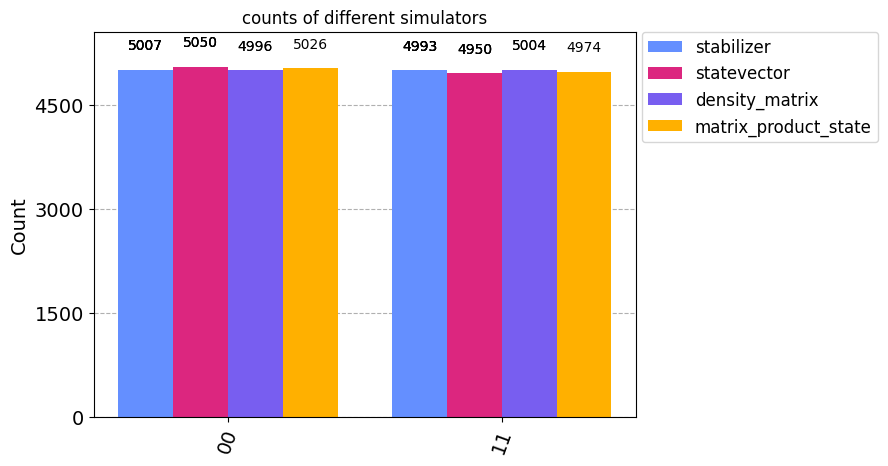

In [16]:
plot_histogram([counts_stabilizer,counts_statevector,counts_density,counts_mps],title='counts of different simulators',legend=['stabilizer','statevector','density_matrix','matrix_product_state'])

In [17]:
from qiskit_aer import AerError
try:
    simulator_gpu=Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)